<H1>Importing packages and datasets</H1>

In [1]:
import torch
import braindecode
import numpy as np
from matplotlib import pyplot as plt
import pathlib
from pathlib import Path
import os

In [2]:
save_folder = r'C:/Users/user/DataspellProjects/BNNproject1/fbcsp_code/first_paper_figures'

<H1>FBCSP(NBPW)</H1>

In [3]:
fbcsp_accuracies = [0.68, 0.42, 0.75, 0.48, 0.4, 0.27, 0.77, 0.75, 0.61]

# итоги FBCSP в итогах BCI IV

for i in range(1,10):
    pass
    # TODO implement multiclass FBCSP(SVM)


<H1>EEGNetV4</H1>

In [4]:
eegnet_accuracies = [0.6701388888888888, 0.4340277777777778, 0.8298611111111112,
                     0.5694444444444444, 0.4201388888888889, 0.3993055555555556, 0.7013888888888888,
                     0.7048611111111112, 0.7395833333333334]

<H1>ShallowFBCSPNet</H1>

In [5]:
fbcspnet_accuracies = [0.6284722222222222, 0.3888888888888889, 0.75, 0.6006944444444444, 0.3888888888888889, 0.4340277777777778,
                       0.6631944444444444, 0.6597222222222222, 0.7083333333333334]

<H1> Bayesian EEGNet and ShallowFBCSPNet Accuracies </H1>

In [6]:
b_eegnet_accuracies = [0.7361111111111112, 0.5173611111111112, 0.8854166666666666, 0.6076388888888888, 0.4444444444444444,
                       0.4201388888888889, 0.8055555555555556, 0.7291666666666666, 0.8229166666666666]

b_fbcspnet_accuracies = [0.71875, 0.4097222222222222, 0.8680555555555556, 0.6006944444444444, 0.5347222222222222, 0.4409722222222222,
                         0.8541666666666666, 0.7256944444444444, 0.7638888888888888]

<H1>Deterministic EEGNet and ShallowFBCSPNet Ensembles Accuracies</H1>

In [7]:
e_eegnet_accuracies = []
e_fbcspnet_accuracies = []

<H1> Graph Plotting </H1>

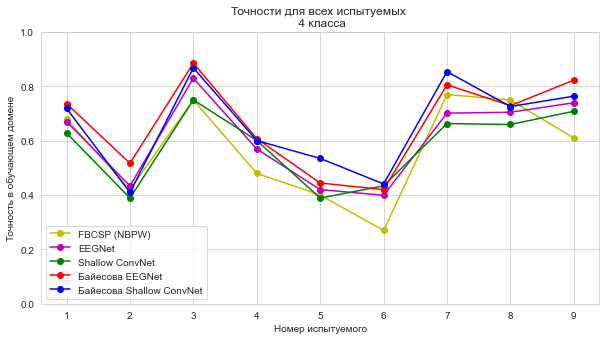

In [17]:
n_subjects = [n for n in range(1,10)]

fig = plt.figure(figsize=(10,5))
sbp = fig.add_subplot(111, title='Точности для всех испытуемых \n 4 класса'
                      , xlabel='Номер испытуемого', ylabel='Точность в обучающем домене')
sbp.set_ylim([0,1])
sbp.plot(n_subjects, fbcsp_accuracies, 'yo-', label='FBCSP (NBPW)')
sbp.plot(n_subjects, eegnet_accuracies, 'mo-', label='EEGNet')
sbp.plot(n_subjects, fbcspnet_accuracies, 'go-', label='Shallow ConvNet')
sbp.plot(n_subjects, b_eegnet_accuracies, 'ro-', label='Байесова EEGNet')
sbp.plot(n_subjects, b_fbcspnet_accuracies, 'bo-', label='Байесова Shallow ConvNet')
sbp.legend(loc=3)

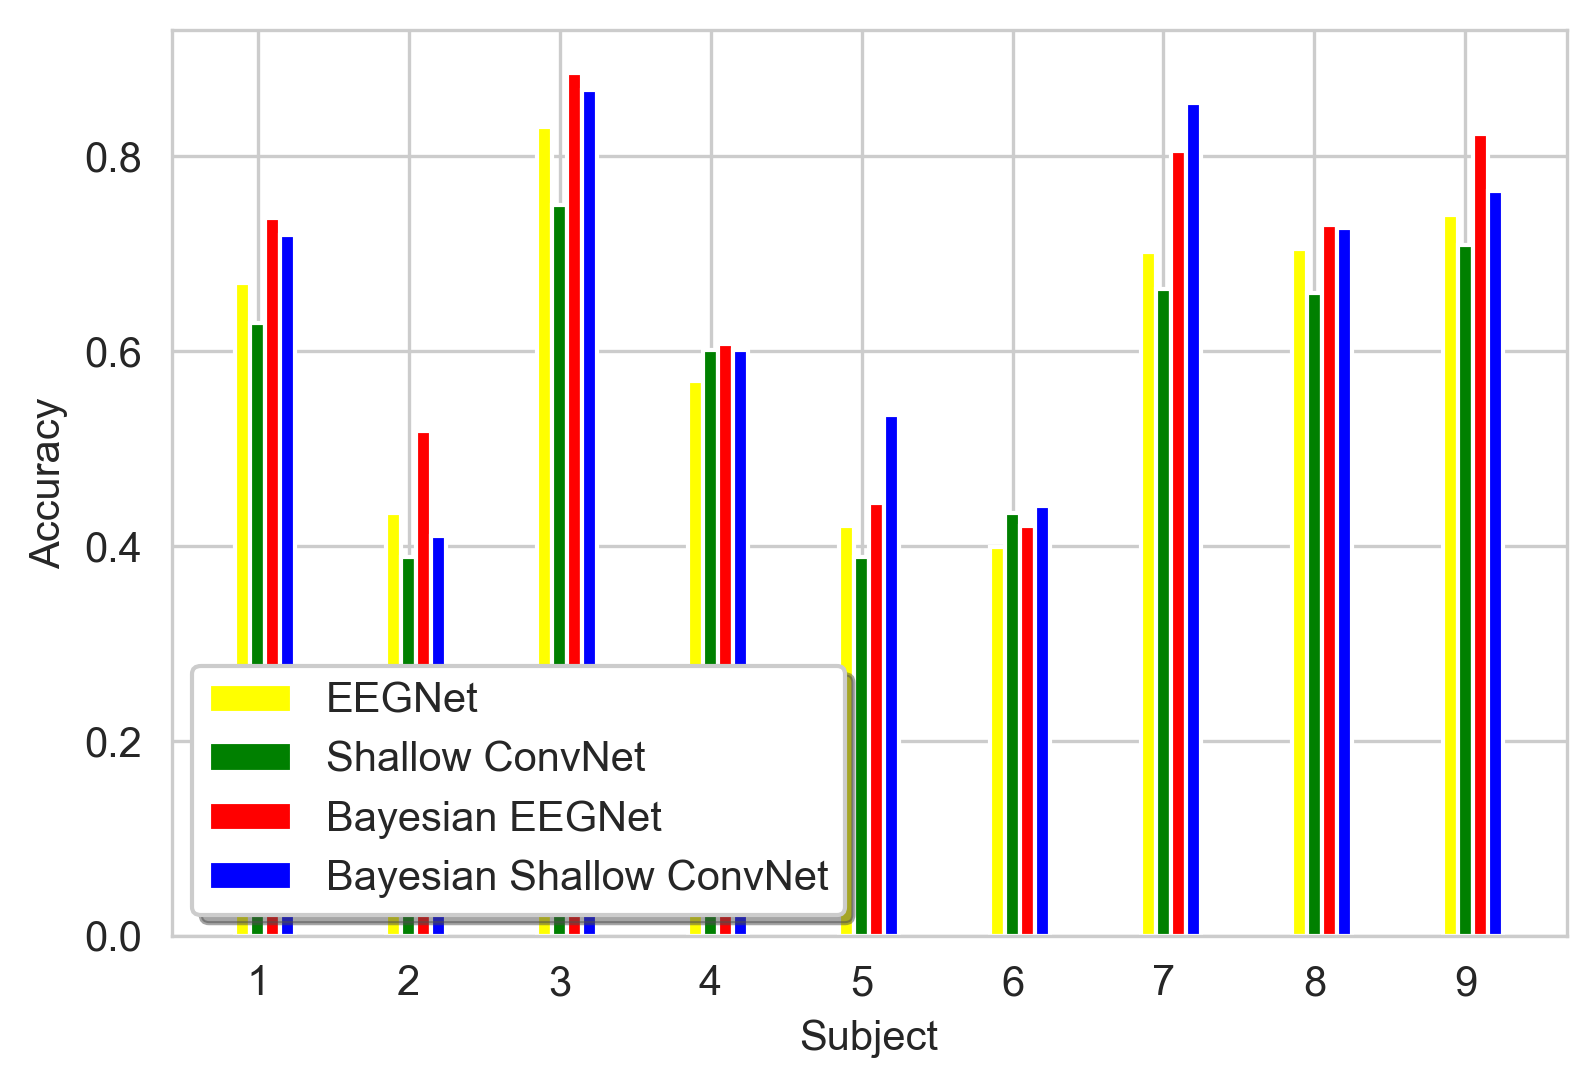

In [18]:
n_subjects = [n for n in range(1,10)]
fig, ax = plt.subplots(dpi=300)
colors = ['magenta','yellow', 'green', 'red', 'blue']
bar_width = 0.1
#bar_1 = ax.bar([x-2*bar_width for x in n_subjects], fbcsp_accuracies, bar_width, color=colors[0])
bar_2 = ax.bar([x-1*bar_width for x in n_subjects], eegnet_accuracies, bar_width, color=colors[1])
bar_3 = ax.bar([x for x in n_subjects], fbcspnet_accuracies, bar_width, color=colors[2])
bar_4 = ax.bar([x+1*bar_width for x in n_subjects], b_eegnet_accuracies, bar_width, color=colors[3])
bar_5 = ax.bar([x+2*bar_width for x in n_subjects], b_fbcspnet_accuracies, bar_width, color=colors[4])

#plt.title('Accuracy on four classes')
plt.ylabel('Accuracy')
plt.xlabel('Subject')
ax.set_xticks(n_subjects)
ax.set_xticklabels(n_subjects)

plt.legend([bar_2,bar_3,bar_4,bar_5],['EEGNet', 'Shallow ConvNet', 'Bayesian EEGNet', 'Bayesian Shallow ConvNet'], loc=3, shadow=True)

savepath = os.path.join(save_folder, 'figure_5.jpg')
fig.savefig(savepath)
plt.show()

In [19]:
#Провести Вилкоксона

In [20]:
from scipy.stats import wilcoxon

In [21]:
print(np.mean(fbcsp_accuracies))
print(np.mean(eegnet_accuracies))
print(np.mean(b_eegnet_accuracies))
print(np.mean(fbcspnet_accuracies))
print(np.mean(b_fbcspnet_accuracies))

0.57
0.6076388888888888
0.6631944444444444
0.5802469135802468
0.6574074074074073


In [22]:
print(np.var(fbcsp_accuracies))
print(np.var(eegnet_accuracies))
print(np.var(b_eegnet_accuracies))
print(np.var(fbcspnet_accuracies))
print(np.var(b_fbcspnet_accuracies))

0.029777777777777775
0.022122020747599457
0.026234567901234563
0.01730871818320378
0.02547903806584362


In [23]:
architectures = ['EEGNet','Shallow ConvNet','Bayesian \n EEGNet','Bayesian \n Shallow ConvNet']
x_pos = np.arange(len(architectures))
means = [0.6030092592592592, 0.574074074074074, 0.6624228395061729, 0.6516203703703705]
vars = [0.023935828189300415, 0.019525891632373112, 0.026614416628562718, 0.027357145919067214]
vars = [np.sqrt(var) for var in vars]
print(x_pos)

[0 1 2 3]


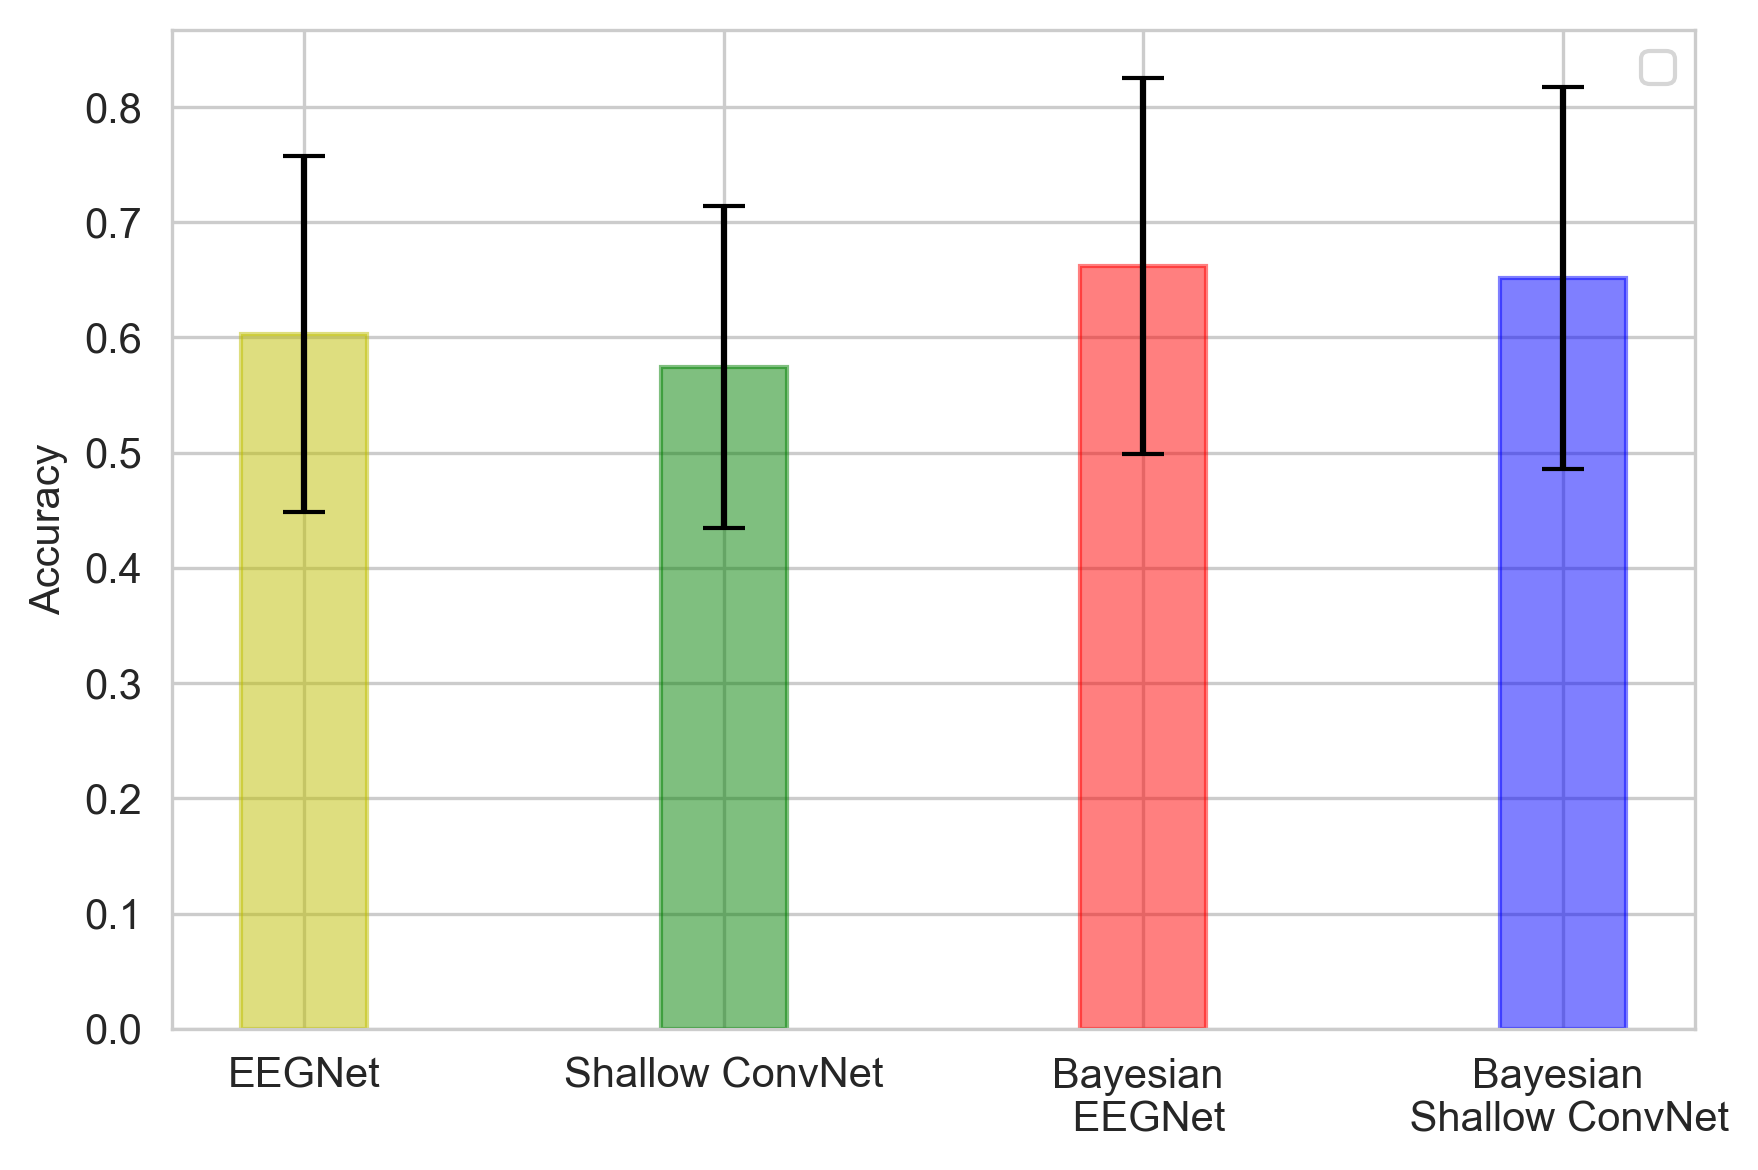

In [24]:
fig, ax = plt.subplots(dpi=300)
colors = ['yellow', 'green', 'red', 'blue']
bars = []
bar_width = 0.1

barlist = ax.bar(x_pos, means, yerr=vars, align='center', alpha=0.5, ecolor='black', capsize=5, width=0.3)

barlist[0].set_color('y')
barlist[1].set_color('g')
barlist[2].set_color('r')
barlist[3].set_color('b')

ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(architectures)
#ax.set_title('Average accuracy across all subjects on four classes')
ax.yaxis.grid(True)
plt.legend(bars,architectures)
plt.tight_layout()
savepath = os.path.join(save_folder, 'figure_6.jpg')
fig.savefig(savepath)
plt.show()

In [25]:
print(wilcoxon(fbcsp_accuracies, b_eegnet_accuracies))
print(wilcoxon(b_eegnet_accuracies, b_fbcspnet_accuracies))
print(wilcoxon(eegnet_accuracies, b_eegnet_accuracies))
print(wilcoxon(fbcsp_accuracies, b_fbcspnet_accuracies))
print(wilcoxon(fbcspnet_accuracies, b_fbcspnet_accuracies))

WilcoxonResult(statistic=1.0, pvalue=0.0078125)
WilcoxonResult(statistic=19.0, pvalue=0.734375)
WilcoxonResult(statistic=0.0, pvalue=0.00390625)
WilcoxonResult(statistic=3.0, pvalue=0.01953125)
WilcoxonResult(statistic=0.0, pvalue=0.011718685599768628)


E:\anaconda\envs\braindecode\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
E:\anaconda\envs\braindecode\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
